In [27]:
import json
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
def load_question_data(file_path):
    """
    Loads question data from a JSON file.

    Args:
        file_path (str): The path to the JSON file.

    Returns:
        list: A list of dictionaries, where each dictionary represents a question.
    """
    try:
        with open(file_path, 'r', encoding="utf-8") as f:
            data = json.load(f)
        return data
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
        return []

def find_knee_point(y_values):
    """
    Finds the knee point in a given array using the Kneedle algorithm from the 'kneed' library.

    Args:
        y_values (list or numpy.ndarray): The array of data points (y-axis values).

    Returns:
        int: The index of the knee point.
    """
    if len(y_values) < 2:
        return -1

    x_values = np.arange(len(y_values))

    # Use the KneeLocator class to find the knee point
    # 'curve' is set to 'concave' because we expect a downward sloping curve.
    # 'direction' is set to 'decreasing' because the scores are in descending order.
    # The 'S' parameter controls the sensitivity; a lower value means more sensitive.
    kneedle = KneeLocator(x_values, y_values, S=1.0, curve='concave', direction='decreasing')
    kneedle.plot_knee()
    # The KneeLocator returns the index of the knee point
    return kneedle.knee

def analyze_question(question_text, data, score_type='listwise'):
    """
    Looks up a question, sorts candidate answers, finds the knee point,
    and plots the scores.

    Args:
        question_text (str): The text of the question to look up.
        data (list): The dataset of questions.
        score_type (str): The score to use for ranking and plotting. Default is 'listwise'.
    """
    # Find the question in the dataset
    question = next((q for q in data if q['question'].lower() == question_text.lower()), None)

    if not question:
        print(f"Question '{question_text}' not found in the dataset.")
        return

    # Get candidate answers and scores
    candidate_answers = question.get('candidate_answers', {})
    
    # Sort candidate answers by the specified score in descending order
    sorted_answers = sorted(
        candidate_answers.items(),
        key=lambda item: item[1].get(score_type, 0),
        reverse=True
    )
    
    answer_labels = [item[0] for item in sorted_answers]
    raw_scores = [item[1].get(score_type, 0) for item in sorted_answers]
    
    # Find the knee point
    knee_index = find_knee_point(raw_scores)
    
    # --- Plotting the raw scores as points on a line graph ---
    plt.figure(figsize=(12, 6))
    plt.plot(answer_labels, raw_scores, 'o-', color='skyblue', label=f'Raw {score_type.capitalize()} Scores')
    plt.plot(answer_labels[knee_index], raw_scores[knee_index], 'ro', markersize=10, label=f'Knee Point at {answer_labels[knee_index]}')
    plt.title(f'Raw {score_type.capitalize()} Scores for "{question_text}"')
    plt.xlabel('Candidate Answers')
    plt.ylabel(f'{score_type.capitalize()} Score')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Plotting the normalized scores as points on a line graph ---
    total_raw_sum = sum(raw_scores)
    if total_raw_sum == 0:
        print("Cannot normalize scores as the total sum is zero.")
        return
        
    normalized_scores = [score / total_raw_sum for score in raw_scores]
    
    # Find the knee point for normalized scores (it will be the same index but good practice to find it again)
    knee_index_normalized = find_knee_point(normalized_scores)

    plt.figure(figsize=(12, 6))
    plt.plot(answer_labels, normalized_scores, 'o-', color='lightgreen', label=f'Normalized {score_type.capitalize()} Scores')
    plt.plot(answer_labels[knee_index_normalized], normalized_scores[knee_index_normalized], 'ro', markersize=10, label=f'Knee Point at {answer_labels[knee_index_normalized]}')
    plt.title(f'Normalized {score_type.capitalize()} Scores for "{question_text}"')
    plt.xlabel('Candidate Answers')
    plt.ylabel(f'Normalized {score_type.capitalize()} Score')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--')
    plt.legend()
    plt.tight_layout()
    plt.show()


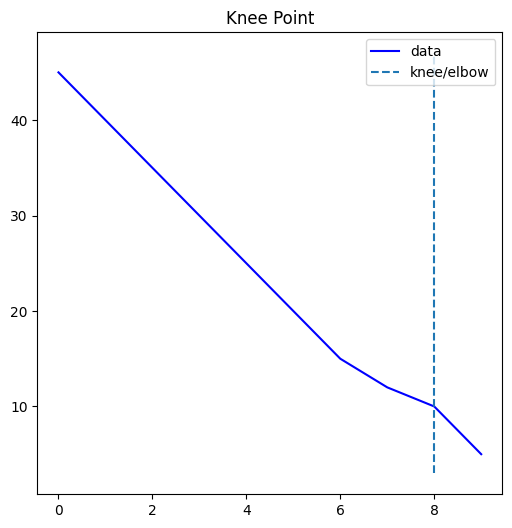

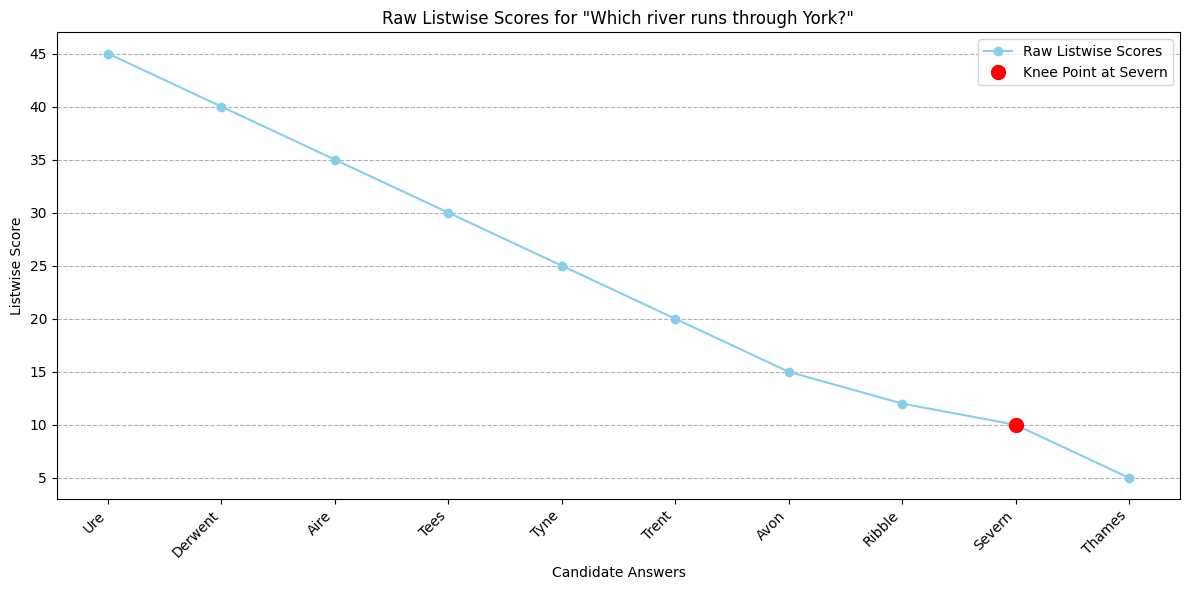

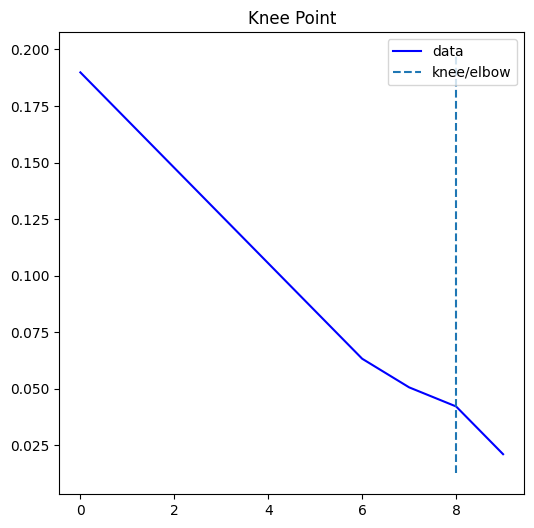

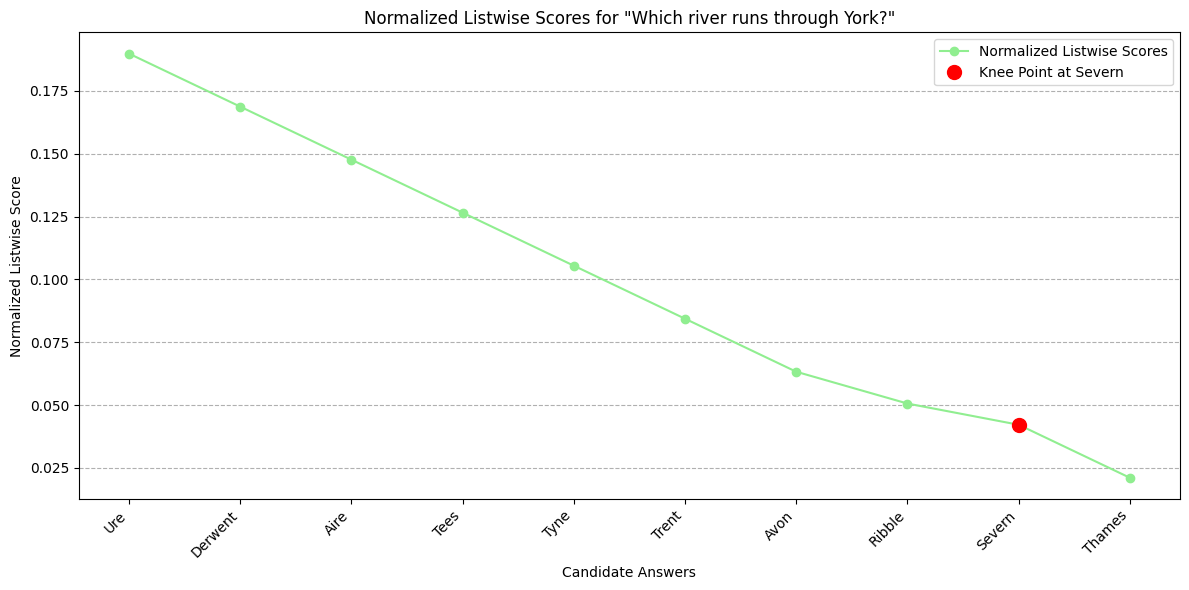

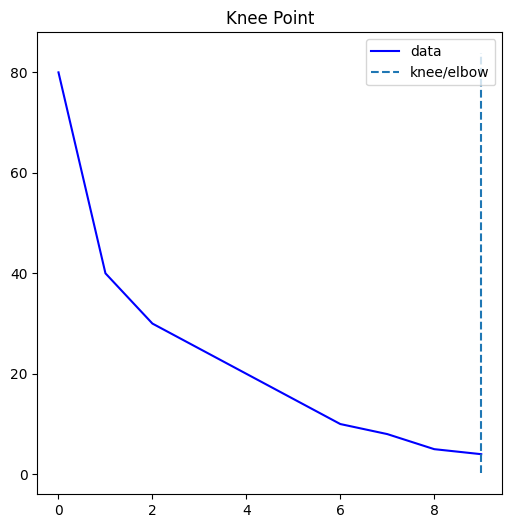

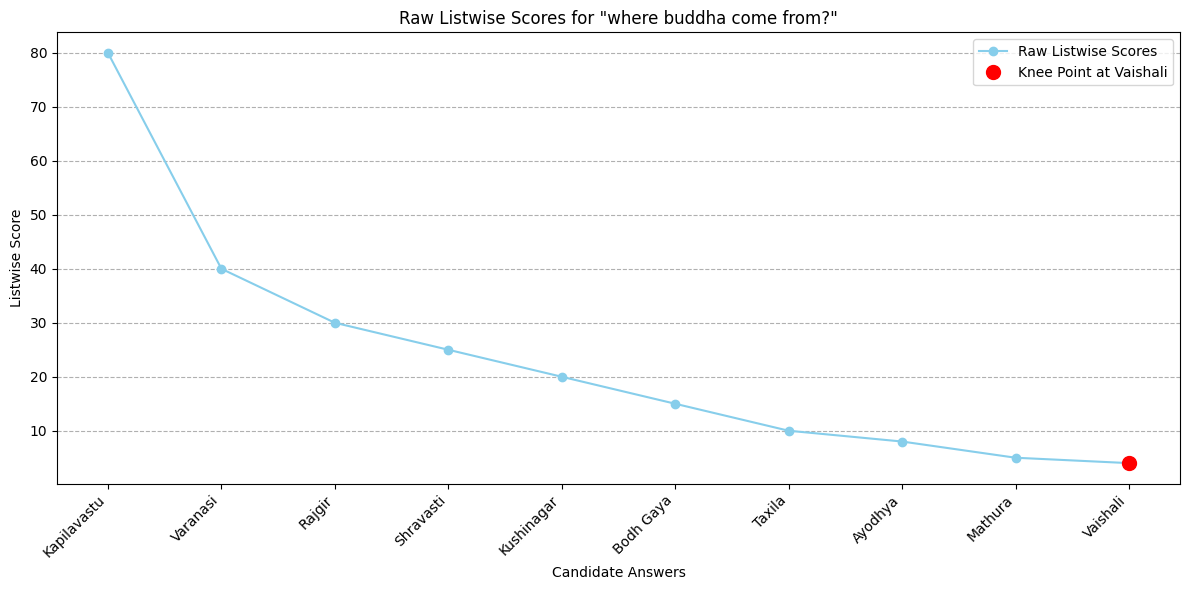

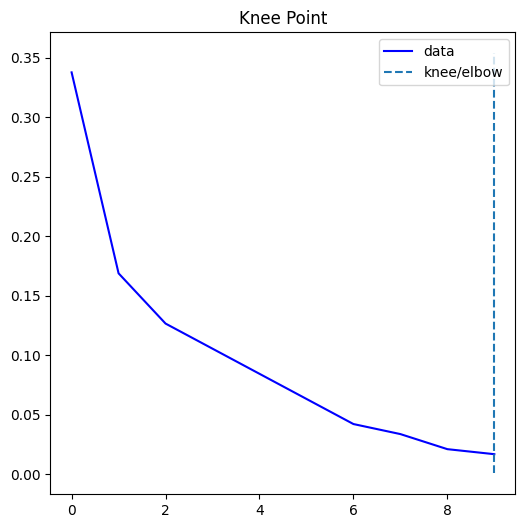

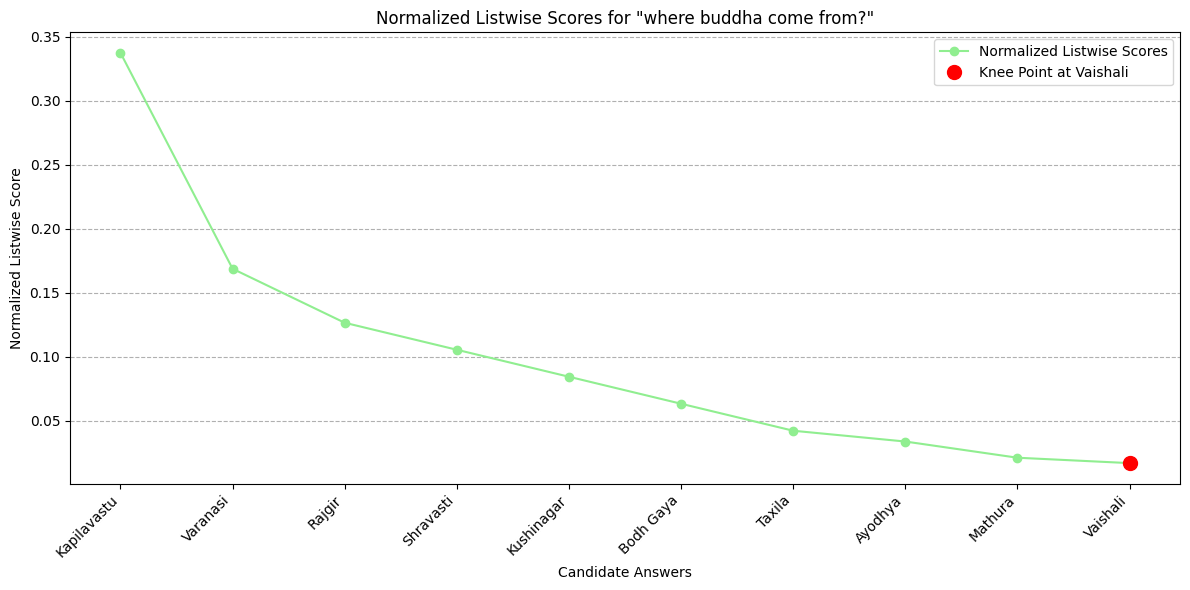

In [29]:
# Load the dataset
data_file = '1200_verified_questions.json' # This should be the path to your dataset file
questions_data = load_question_data(data_file)

if questions_data:
    # Example question from your provided file
    sample_question = "Which river runs through York?"
    analyze_question(sample_question, questions_data, 'listwise')

    sample_question_2 = "where buddha come from?"
    analyze_question(sample_question_2, questions_data, 'listwise')

In [13]:
# loop through the question data and find two questions with the same raw sum
same_sum_questions = {}
for question in questions_data:
    raw_sum = sum(question['candidate_answers'][cand]['listwise'] for cand in question['candidate_answers'])
    if raw_sum not in same_sum_questions:
        same_sum_questions[raw_sum] = []
    same_sum_questions[raw_sum].append(question['question'])

In [ ]:
same_sum_questions

{548: ['how many countries does cadbury sell its products?'],
 237: ['who played daisy duke in the new dukes of hazzard?',
  'On Red Nose Day 2001 who won Celebrity Big Brother?',
  'The song "Sit down, you\'re rockin\' the boat" is from which musical?"',
  'who said everyone will be famous for 15 minutes?',
  'what is the money of switzerland called?',
  'Which creature disappeared leaving only a smile?',
  "Which British band reached number one in the UK pop charts in June 1983 with the record 'Every Breath You Take'?",
  'where buddha come from?',
  '"Ol" Blue Eyes" is the nickname of?',
  'Which river runs through York?'],
 420: ['what color pages in the emergency response guidebook ( erg ) list compounds by name?',
  'what is the sacred text of daoism?',
  "Which German mathematician, physicist and astonomer (1777 - 1855) was involved in the first worldwide survey of the Earth's magnetic field and gives his name to a unit of magnetic induction ?",
  'Digestive biscuits were invent

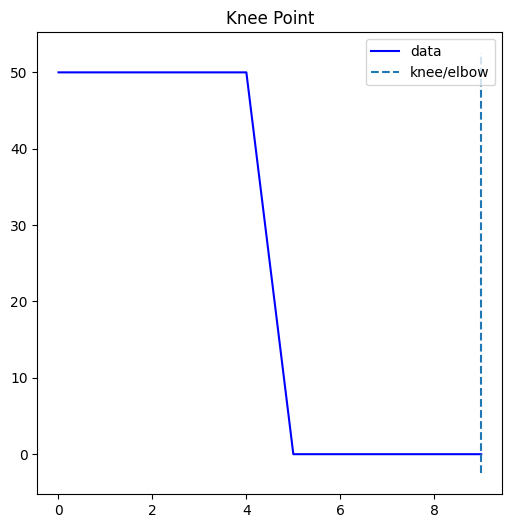

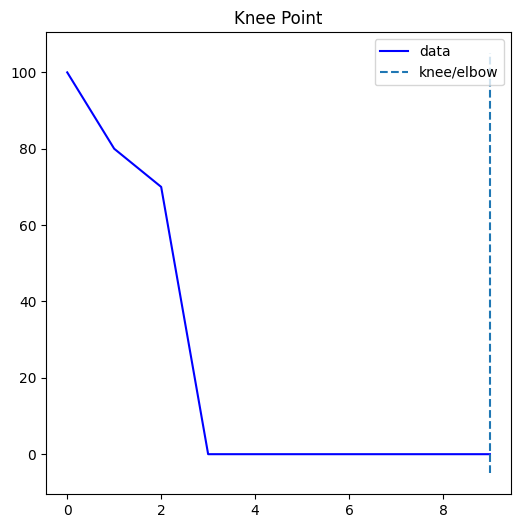

In [30]:
y_values_str_1 = "50-50-50-50-50-0-0-0-0-0"
y_values_str_2 = "100-80-70-0-0-0-0-0-0-0"
y_values_1 = [int(x) for x in y_values_str_1.split('-')]
y_values_2 = [int(x) for x in y_values_str_2.split('-')]
x_values = np.arange(len(y_values_1))

kneedle1 = KneeLocator(x_values, y_values_1, S=1.0, curve='concave', direction='decreasing')

kneedle1.plot_knee()

kneedle2 = KneeLocator(x_values, y_values_2, S=1.0, curve='concave', direction='decreasing')
kneedle2.plot_knee()